In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install -U matplotlib #matplotlib library helps graph the data

Requirement already up-to-date: matplotlib in c:\users\het.parikh\appdata\local\continuum\anaconda3\lib\site-packages (3.3.3)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn #Provides a high-level interface for drawing attractive and informative statistical graphics.

Note: you may need to restart the kernel to use updated packages.


In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl
import scipy.stats as si

In [10]:
tick='DIS' #Took Walt Disney stock from S&P 500 list
start="2019-12-07"
end="2020-12-08"
df = yf.download(tick,start,end)

[*********************100%***********************]  1 of 1 completed


In [12]:
df.head() #view first 4 row of data (data frame)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-09,147.960007,148.509995,145.399994,146.210007,145.339249,11515000
2019-12-10,145.259995,146.850006,145.050003,146.100006,145.229889,7084100
2019-12-11,147.389999,147.889999,146.759995,147.589996,146.711014,8253700
2019-12-12,147.919998,148.929993,147.250000,147.759995,146.880005,7748300
2019-12-13,147.429993,147.800003,146.309998,146.380005,146.380005,9350100


In [11]:
df.tail() #view last 4 row of data (data frame)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,149.570007,151.399994,149.000000,149.440002,149.440002,8827800
2020-12-02,149.490005,154.009995,148.339996,153.610001,153.610001,10601900
2020-12-03,153.449997,154.440002,152.130005,153.240005,153.240005,9063200
2020-12-04,153.690002,154.679993,152.809998,154.139999,154.139999,6033300
2020-12-07,153.179993,153.880005,152.259995,153.679993,153.679993,6815500


# Describe Data and Draw Price Graph

In [13]:
df=df['Adj Close'] #df now become a data series
df.describe().round(2) #describe data

count    252.00
mean     124.63
std       15.75
min       85.76
25%      115.43
50%      124.07
75%      138.52
max      154.14
Name: Adj Close, dtype: float64

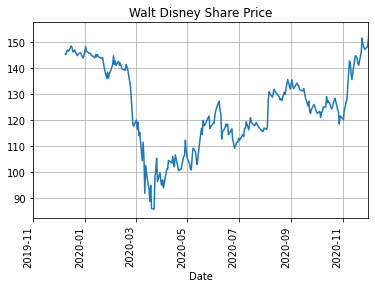

In [20]:
df.plot(label=tick)
plt.xlabel('Date')
plt.title('Walt Disney Share Price')
plt.xticks(rotation=90)
plt.xlim('2019-11','2020-12')
plt.grid()

# Calculate volatility

In [27]:
S = df[-1]
print('The spot price is $', round(S,2))

The spot price is $ 153.68


In [29]:
log_return = np.log(df / df.shift(1))

In [30]:
vol = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 46.84 %


# Calculate volatility by different rolling windows

In [33]:
data_price = pd.DataFrame(df)

In [34]:
data_price['1 week'] = log_return.rolling(5).std() * np.sqrt(252)
data_price['1 months'] = log_return.rolling(21).std() * np.sqrt(252)
data_price['3 months'] = log_return.rolling(63).std() * np.sqrt(252)
data_price['6 months'] = log_return.rolling(162).std() * np.sqrt(252)

C:\Users\het.parikh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:396: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

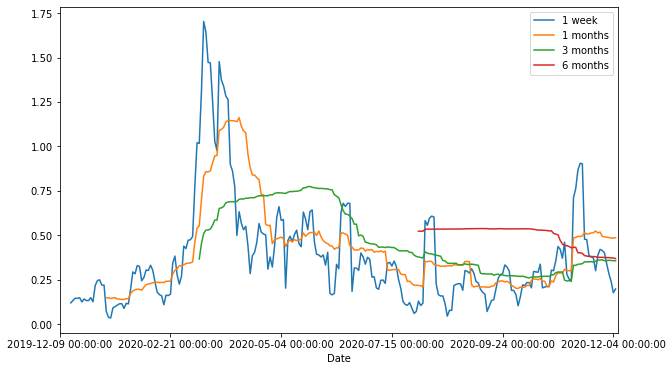

In [36]:
data_price[['1 week', '1 months', '3 months','6 months']].plot(figsize=(10, 6))

# Pricing an European put option

### 1. Binomial Model

In [66]:
S0 = 153.68             # spot stock price
K = 100.0               # strike
T = 1                  # maturity 
r = 0.9                 # risk free rate 
sig = 0.46              # diffusion coefficient or volatility
N = 3                   # number of periods or number of time steps  
payoff = "put"          # payoff

In [67]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor

In [68]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [69]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

1.084979051677911

In [70]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 30.72187866]])

In [71]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[-7.66510973e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  1.21757253e-01,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.93406607e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.07218787e+01]])

In [72]:
print('European ' + payoff, str( V[0,0]))

European put -0.007665109734480369


### 2. Monte Carlo Model 

In [183]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [184]:
T = 1
r = 0.9
sigma = 0.46
S0 = 153.68             # spot stock price
K = 100

In [185]:
S = mcs_simulation_np(500)

In [186]:
S = np.transpose(S)
S

array([[153.68      , 155.60198462, 152.79423493, ..., 331.04915996,
        339.15902586, 336.0012688 ],
       [153.68      , 152.10602144, 154.07955175, ..., 437.48606732,
        425.14381101, 431.70268508],
       [153.68      , 154.75435849, 159.06276244, ..., 238.69332058,
        250.64763055, 242.91397377],
       ...,
       [153.68      , 155.44144694, 154.81133689, ..., 322.93240489,
        315.55172332, 318.25099689],
       [153.68      , 155.33773624, 153.97199443, ..., 379.6837999 ,
        371.82232487, 376.50315463],
       [153.68      , 153.09071241, 157.11008275, ..., 438.81613153,
        436.10909657, 423.7070801 ]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

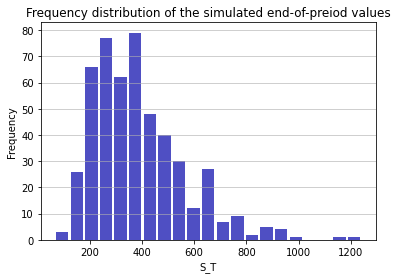

In [187]:
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [188]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 0.08778152350801031


In [189]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 287.70577237367337


### 3. Black-Scholes Model

#### Non-Dividend

In [190]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [191]:
euro_option_bs(153.68, 100, 1, 0.9, 0.46, 'put')

0.019882198181631672

In [192]:
S = np.linspace(50,200,11)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 100, 1, 0.9, 0.46, 'put')

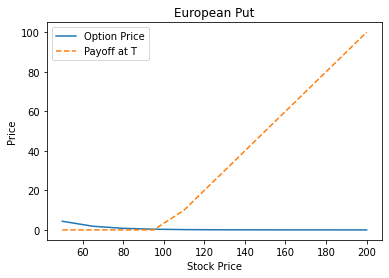

In [193]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(S-100,0), '--')
plt.xlabel('Stock Price')
plt.ylabel('Price')
plt.title('European Put')
plt.legend(['Option Price','Payoff at T'])

### Risk Analysis

#### Dividend function

In [194]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #q: continuous dividend yield (not applicable for BA so q=o)
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [195]:
euro_option_bsm(153.68, 100, 1, 0.9, 0, 0.46, 'call')

113.04291622412173

In [196]:
euro_option_bsm(153.68, 100, 1, 0.9, 0, 0.46, 'put')

0.019882198181631672

In [114]:
S = np.linspace(50,200,11)
Call = np.zeros((len(S),1))
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Call [i] = euro_option_bsm(S[i], 100, 1, 0.9, 0, 0.46, 'call')
    Put  [i] = euro_option_bsm(S[i], 100, 1, 0.9, 0, 0.46, 'put')

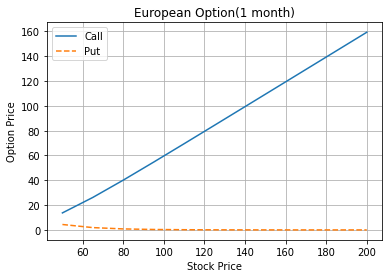

In [115]:
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option(1 month)')
plt.legend(['Call','Put'])

### Greeks

#### Delta

In [116]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [117]:
d=delta(153.68, 100, 1, 0.9, 0, 0.46, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase $1, then the value of the call option will increase $', d.round(4), '.')

The value of Delta is 0.9991 . If the stock price increase $1, then the value of the call option will increase $ 0.9991 .


In [118]:
d=delta(153.68, 100, 1, 0.9, 0, 0.46, 'put')
print('The value of Delta is', d.round(4),'.','If the stock price increase $1, then the value of the put option will decrease $', -d.round(4), '.')

The value of Delta is -0.0009 . If the stock price increase $1, then the value of the put option will decrease $ 0.0009 .


In [127]:
S = np.linspace(50, 200, 51)
T = np.linspace(0.0005, 2, 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 100, T[i], 0.9, 0, 0.46, 'call')

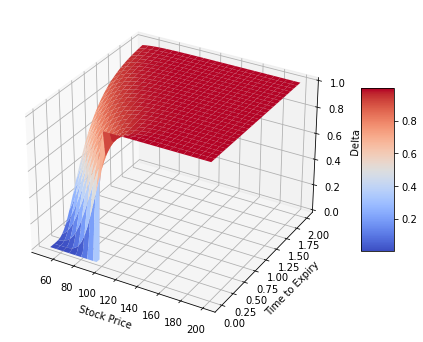

In [128]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Gamma

In [129]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(-r * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * T)
    
    return gamma

In [130]:
gamma(153.68, 100, 1, 0.9, 0, 0.46, 'call')

1.7618993159418325e-05

In [131]:
gamma(153.68, 100, 1, 0.9, 0, 0.46, 'put')

1.7618993159418325e-05

In [132]:
S = np.linspace(50, 200, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 100, T[i], 0.9, 0, 0.46, 'call')

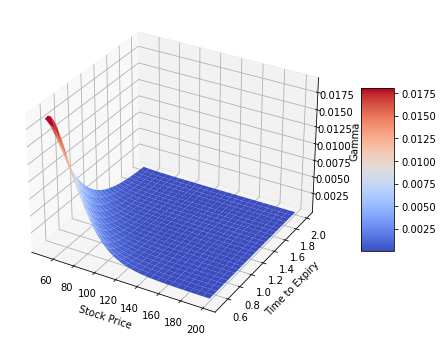

In [133]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Speed

In [134]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * T) * (d1 + vol * np.sqrt(T))
    
    return speed

In [135]:
speed(153.68, 100, 1, 0.9, 0, 0.46, 'call')

2.194995769981434e-06

In [136]:
speed(153.68, 100, 1, 0.9, 0, 0.46, 'put')

2.194995769981434e-06

In [145]:
S = np.linspace(50, 200, 51) 
T = np.linspace(0.5, 2, 51) 
Speed = np.zeros((len(T),len(S))) 
for j in range(len(S)):
    for i in range(len(T)): 
        Speed[i,j] = speed(S[j], 100, T[i], 0.9, 0, 0.46, 'call')

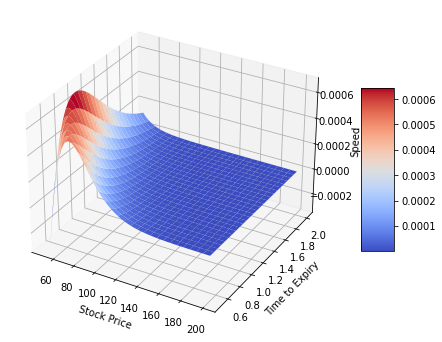

In [146]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Theta

In [140]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = - vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * T) + q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = - vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * T) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [141]:
theta(153.68, 100, 1, 0.9, 0, 0.46, 'call')

-36.5568693769193

In [143]:
theta(153.68, 100, 1, 0.9, 0, 0.46, 'put')

-0.25096909773964793

In [147]:
S = np.linspace(50, 200, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 100, T[i], 0.9, 0, 0.46, 'call')

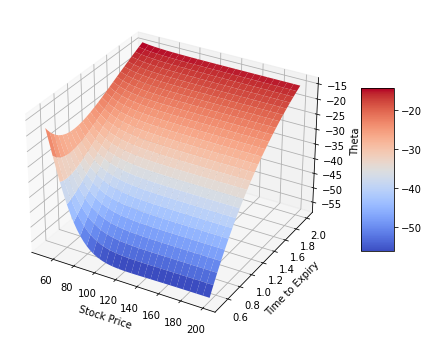

In [148]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Rho

In [149]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [150]:
rho(153.68, 100, 1, 0.9, 0, 0.46, 'call')

40.49842758657421

In [151]:
rho(153.68, 100, 1, 0.9, 0, 0.46, 'put')

-0.15853838748570287

In [159]:
S = np.linspace(50, 200, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 100, T[i], 0.9, 0, 0.46, 'call')

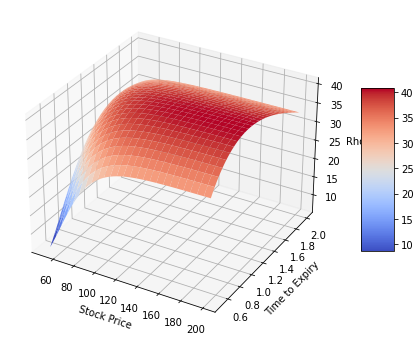

In [160]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Vega

In [156]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [157]:
vega(153.68, 100, 1, 0.9, 0, 0.46, 'call')

0.47080238696745796

In [158]:
vega(153.68, 100, 1, 0.9, 0, 0.46, 'put')

0.47080238696745796

In [161]:
S = np.linspace(50, 200, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 100, T[i], 0.9, 0, 0.46, 'call')

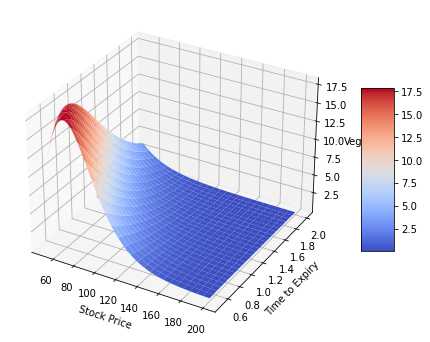

In [162]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [163]:
vol = np.linspace(0.5,1.5,15)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(153.68, 100, 1, 0.9, 0, vol[i], 'call')

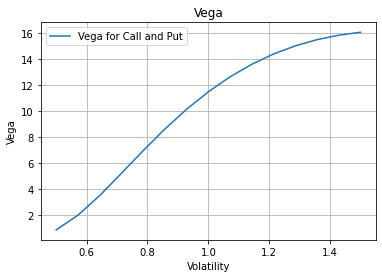

In [164]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])